<a href="https://colab.research.google.com/github/brandonliu777/datathon25/blob/main/Sentiment_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np

np.random.seed(0)

data = pd.read_csv('/content/cleaned_data_with_engagement_and_positivity.csv')
data.head()

,subreddit,selftext,title,upvote_ratio,ups,score,author_premium,edited,allow_live_comments,media_only,...,num_comments,stickied,subreddit_subscribers,created_utc,num_crossposts,is_video,post_hint,engagement_rate,Title_Sentiment,Self_Text_Sentiment
0,news,NaN,"Trump can’t end birthright citizenship, appeal...",0.98,17843,17843,False,FALSE,False,False,...,957,False,29514062,2025-02-20 3:03:21,1,False,link,0.000637,NEGATIVE,POSITIVE
1,AskReddit,NaN,What will Americans do if Social Security is r...,0.86,16500,16500,False,FALSE,True,False,...,15226,False,51734018,2025-02-19 15:31:31,4,False,NaN,0.000613,NEGATIVE,POSITIVE
2,pics,NaN,Ukraine President Zelensky handes over a battl...,0.93,28025,28025,False,FALSE,False,False,...,1014,False,31399815,2025-02-20 2:10:34,6,False,image,0.000925,POSITIVE,POSITIVE
3,Conservative,NaN,Trump finally calls out the Ukraine scam,0.76,8079,8079,False,FALSE,False,False,...,9337,False,1204356,2025-02-19 16:10:19,11,False,image,0.014461,NEGATIVE,POSITIVE
4,MadeMeSmile,NaN,Good Husband,0.92,49342,49342,False,FALSE,False,False,...,624,False,11111113,2025-02-20 1:26:35,6,True,hosted:video,0.004497,POSITIVE,POSITIVE


In [ ]:
# Filter the DataFrame to include only rows where 'Title_Sentiment' is 'POSITIVE'
positive_title_sentiment_df = data[data['Title_Sentiment'] == 'POSITIVE']
positive_title_sentiment_df

,subreddit,selftext,title,upvote_ratio,ups,score,author_premium,edited,allow_live_comments,media_only,...,num_comments,stickied,subreddit_subscribers,created_utc,num_crossposts,is_video,post_hint,engagement_rate,Title_Sentiment,Self_Text_Sentiment
2,pics,NaN,Ukraine President Zelensky handes over a battl...,0.93,28025,28025,False,FALSE,False,False,...,1014,False,31399815,2025-02-20 2:10:34,6,False,image,0.000925,POSITIVE,POSITIVE
4,MadeMeSmile,NaN,Good Husband,0.92,49342,49342,False,FALSE,False,False,...,624,False,11111113,2025-02-20 1:26:35,6,True,hosted:video,0.004497,POSITIVE,POSITIVE
9,BlueskySocial,NaN,Just saying,0.93,18477,18477,False,FALSE,False,False,...,355,False,175856,2025-02-20 1:15:48,2,False,image,0.107088,POSITIVE,POSITIVE
11,meirl,NaN,meirl,0.98,26860,26860,False,FALSE,False,False,...,201,False,2917660,2025-02-20 0:11:01,0,False,image,0.009275,POSITIVE,POSITIVE
20,GenZ,NaN,Which billionaire are you most excited to die ...,0.83,37285,37285,False,FALSE,False,False,...,3897,False,441404,2025-02-19 14:01:38,10,False,image,0.093298,POSITIVE,POSITIVE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9308,technology,NaN,Meta approves bonuses of up to 200% of company...,0.97,10177,10177,True,FALSE,False,False,...,331,False,18088743,2025-02-21 12:14:27,1,False,link,0.000581,POSITIVE,POSITIVE
9310,NYYankees,NaN,Yankee players can now grow facial hair,0.93,1515,1515,False,FALSE,False,False,...,617,False,384094,2025-02-21 13:57:22,2,False,link,0.005551,POSITIVE,POSITIVE
9311,europe,NaN,This is apparently how it started,0.98,8456,8456,False,FALSE,False,False,...,57,False,8571195,2025-02-21 15:58:08,1,False,image,0.000993,POSITIVE,POSITIVE
9312,Damnthatsinteresting,NaN,The Russian tradition of bizarre wedding photos,0.92,11064,11064,False,FALSE,False,False,...,282,False,19525324,2025-02-21 15:19:55,3,False,NaN,0.000581,POSITIVE,POSITIVE


In [ ]:
# Calculate the average of the 'score' column
average_score = positive_title_sentiment_df['score'].mean()

# Print the result
print(f"The average score of Reddit posts with positive title sentiments is: {average_score}")

The average score of Reddit posts with positive title sentiments is: 4154.3914516549385


In [ ]:
# Calculate the average of the 'num_comments' column
average_comments = positive_title_sentiment_df['num_comments'].mean()

# Print the result
print(f"The average number of comments for Reddit posts with positive title sentiments is: {average_comments}")

The average number of comments for Reddit posts with positive title sentiments is: 183.73286421683608


In [ ]:
# Calculate the average number of upvotes
average_upvotes = (positive_title_sentiment_df['score'] * (1 + (1 - positive_title_sentiment_df['upvote_ratio']))).mean()

# Print the result
print(f"The average number of upvotes for Reddit posts with positive title sentiments is: {average_upvotes}")

The average number of upvotes for Reddit posts with positive title sentiments is: 4386.437703935366


In [ ]:
# Filter the DataFrame to include only rows where 'Title_Sentiment' is 'NEGATIVE'
negative_title_sentiment_df = data[data['Title_Sentiment'] == 'NEGATIVE']
negative_title_sentiment_df

,subreddit,selftext,title,upvote_ratio,ups,score,author_premium,edited,allow_live_comments,media_only,...,num_comments,stickied,subreddit_subscribers,created_utc,num_crossposts,is_video,post_hint,engagement_rate,Title_Sentiment,Self_Text_Sentiment
0,news,NaN,"Trump can’t end birthright citizenship, appeal...",0.98,17843,17843,False,FALSE,False,False,...,957,False,29514062,2025-02-20 3:03:21,1,False,link,0.000637,NEGATIVE,POSITIVE
1,AskReddit,NaN,What will Americans do if Social Security is r...,0.86,16500,16500,False,FALSE,True,False,...,15226,False,51734018,2025-02-19 15:31:31,4,False,NaN,0.000613,NEGATIVE,POSITIVE
3,Conservative,NaN,Trump finally calls out the Ukraine scam,0.76,8079,8079,False,FALSE,False,False,...,9337,False,1204356,2025-02-19 16:10:19,11,False,image,0.014461,NEGATIVE,POSITIVE
5,mildlyinfuriating,NaN,Detroit was flooded and it froze over night. C...,0.94,124528,124528,False,FALSE,False,False,...,8222,False,9167926,2025-02-19 19:07:29,57,True,hosted:video,0.014480,NEGATIVE,POSITIVE
6,worldnews,NaN,"Trump attacks Zelensky in a post, calls him a ...",0.89,51235,51235,False,FALSE,False,False,...,7198,False,44255263,2025-02-19 15:54:48,11,False,link,0.001320,NEGATIVE,POSITIVE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9307,TwoXChromosomes,This sub has become increasingly US-centric an...,US defaultism is just as annoying as male defa...,0.75,2466,2466,False,FALSE,False,False,...,688,False,13639691,2025-02-21 9:57:18,1,False,NaN,0.000231,NEGATIVE,NEGATIVE
9309,TheLastAirbender,NaN,Another war is about to start,0.95,15838,15838,False,FALSE,False,False,...,676,False,2072108,2025-02-21 1:04:34,0,False,image,0.007970,NEGATIVE,POSITIVE
9313,flying,I’ve already seen countless posts and forums a...,It infuriates me to see the Endeavor FO’s name...,0.90,1215,1215,False,1740160027,False,False,...,557,False,348286,2025-02-21 13:55:31,0,False,NaN,0.005088,NEGATIVE,NEGATIVE
9314,Global_News_Hub,NaN,Over 100 American doctors protest in front of ...,0.92,6022,6022,False,FALSE,False,False,...,227,False,53094,2025-02-21 14:06:51,6,True,hosted:video,0.117697,NEGATIVE,POSITIVE


In [ ]:
# Calculate the average of the 'score' column
average_score = negative_title_sentiment_df['score'].mean()

# Print the result
print(f"The average score of Reddit posts with negative title sentiments is: {average_score}")

The average score of Reddit posts with negative title sentiments is: 4166.0385036496355


In [ ]:
# Calculate the average of the 'num_comments' column
average_comments = negative_title_sentiment_df['num_comments'].mean()

# Print the result
print(f"The average number of comments for Reddit posts with negative title sentiments is: {average_comments}")

The average number of comments for Reddit posts with negative title sentiments is: 287.61569343065696


In [ ]:
# Calculate the average number of upvotes
average_upvotes = (negative_title_sentiment_df['score'] * (1 + (1 - negative_title_sentiment_df['upvote_ratio']))).mean()

# Print the result
print(f"The average number of upvotes for Reddit posts with negative title sentiments is: {average_upvotes}")

The average number of upvotes for Reddit posts with negative title sentiments is: 4403.482844890511


In [ ]:
# Filter the DataFrame to include only rows where 'Self_Text_Sentiment' is 'POSITIVE'
positive_selftext_sentiment_df = data[data['Self_Text_Sentiment'] == 'POSITIVE']
positive_selftext_sentiment_df

,subreddit,selftext,title,upvote_ratio,ups,score,author_premium,edited,allow_live_comments,media_only,...,num_comments,stickied,subreddit_subscribers,created_utc,num_crossposts,is_video,post_hint,engagement_rate,Title_Sentiment,Self_Text_Sentiment
0,news,NaN,"Trump can’t end birthright citizenship, appeal...",0.98,17843,17843,False,FALSE,False,False,...,957,False,29514062,2025-02-20 3:03:21,1,False,link,0.000637,NEGATIVE,POSITIVE
1,AskReddit,NaN,What will Americans do if Social Security is r...,0.86,16500,16500,False,FALSE,True,False,...,15226,False,51734018,2025-02-19 15:31:31,4,False,NaN,0.000613,NEGATIVE,POSITIVE
2,pics,NaN,Ukraine President Zelensky handes over a battl...,0.93,28025,28025,False,FALSE,False,False,...,1014,False,31399815,2025-02-20 2:10:34,6,False,image,0.000925,POSITIVE,POSITIVE
3,Conservative,NaN,Trump finally calls out the Ukraine scam,0.76,8079,8079,False,FALSE,False,False,...,9337,False,1204356,2025-02-19 16:10:19,11,False,image,0.014461,NEGATIVE,POSITIVE
4,MadeMeSmile,NaN,Good Husband,0.92,49342,49342,False,FALSE,False,False,...,624,False,11111113,2025-02-20 1:26:35,6,True,hosted:video,0.004497,POSITIVE,POSITIVE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9311,europe,NaN,This is apparently how it started,0.98,8456,8456,False,FALSE,False,False,...,57,False,8571195,2025-02-21 15:58:08,1,False,image,0.000993,POSITIVE,POSITIVE
9312,Damnthatsinteresting,NaN,The Russian tradition of bizarre wedding photos,0.92,11064,11064,False,FALSE,False,False,...,282,False,19525324,2025-02-21 15:19:55,3,False,NaN,0.000581,POSITIVE,POSITIVE
9314,Global_News_Hub,NaN,Over 100 American doctors protest in front of ...,0.92,6022,6022,False,FALSE,False,False,...,227,False,53094,2025-02-21 14:06:51,6,True,hosted:video,0.117697,NEGATIVE,POSITIVE
9315,Awww,NaN,My cat seeing a deer for the first time!,0.97,13382,13382,False,FALSE,False,False,...,206,False,994759,2025-02-21 11:09:55,5,True,hosted:video,0.013660,POSITIVE,POSITIVE


In [ ]:
# Calculate the average of the 'score' column
average_score = positive_selftext_sentiment_df['score'].mean()

# Print the result
print(f"The average score of Reddit posts with positive self text sentiments is: {average_score}")

The average score of Reddit posts with positive self text sentiments is: 4403.758598966864


In [ ]:
# Calculate the average of the 'num_comments' column
average_comments = positive_selftext_sentiment_df['num_comments'].mean()

# Print the result
print(f"The average number of comments for Reddit posts with positive self text sentiments is: {average_comments}")

The average number of comments for Reddit posts with positive self text sentiments is: 232.72659695098903


In [ ]:
# Calculate the average number of upvotes
average_upvotes = (positive_selftext_sentiment_df['score'] * (1 + (1 - positive_selftext_sentiment_df['upvote_ratio']))).mean()

# Print the result
print(f"The average number of upvotes for Reddit posts with positive self text sentiments is: {average_upvotes}")

The average number of upvotes for Reddit posts with positive self text sentiments is: 4651.250050396876


In [ ]:
# Filter the DataFrame to include only rows where 'Self_Text_Sentiment' is 'NEGATIVE'
negative_selftext_sentiment_df = data[data['Self_Text_Sentiment'] == 'NEGATIVE']
negative_selftext_sentiment_df

,subreddit,selftext,title,upvote_ratio,ups,score,author_premium,edited,allow_live_comments,media_only,...,num_comments,stickied,subreddit_subscribers,created_utc,num_crossposts,is_video,post_hint,engagement_rate,Title_Sentiment,Self_Text_Sentiment
12,AITAH,My (31F) husband (32M) just mentioned that he'...,AITAH if I'm upset that my husband mentioned g...,0.91,7565,7565,False,1739991867,False,False,...,5042,False,3026903,2025-02-19 17:13:48,0,False,NaN,0.004165,NEGATIVE,NEGATIVE
16,Futurology,The President just signed the following Execut...,POTUS just seized absolute Executive Power. A ...,0.75,58617,58617,False,FALSE,True,False,...,5032,False,21493624,2025-02-19 13:28:58,19,False,self,0.002961,NEGATIVE,NEGATIVE
17,popculturechat,"for every breaking bad or game of thrones, the...",tv shows you feel like no one watched but you 📺😔,0.95,6651,6651,False,FALSE,False,False,...,4286,False,4826253,2025-02-19 19:07:20,2,False,NaN,0.002266,NEGATIVE,NEGATIVE
33,illinois,https://youtu.be/G3_SLAzHMmc,"Pritzker: ""We don't have kings in America, and...",0.95,18419,18419,False,FALSE,False,False,...,568,False,218463,2025-02-19 22:25:40,5,False,self,0.086912,NEGATIVE,NEGATIVE
36,SubredditDrama,"Edit: by ""him"" I mean Zelensky. Conservative u...",r/Conservative users react to Trump blaming Ze...,0.90,18936,18936,False,1739996977,False,False,...,2707,False,982630,2025-02-19 18:31:08,3,False,NaN,0.022026,NEGATIVE,NEGATIVE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9294,mildlyinfuriating,first screenshot is the post these comments ar...,these comments on a post about a woman who pro...,0.92,5100,5100,False,FALSE,False,False,...,933,False,9190312,2025-02-21 15:04:35,0,False,NaN,0.000656,NEGATIVE,NEGATIVE
9303,NBATalk,Title. \n\nFor the people who were there durin...,Was Michael Jordan appreciated during his prim...,0.84,836,836,False,FALSE,False,False,...,737,False,109411,2025-02-21 14:59:46,0,False,image,0.014377,NEGATIVE,NEGATIVE
9304,kingdomcome,I was snooping around a tavern trying to pract...,I'm an actual idiot... [KCD2],0.99,4288,4288,False,1740163071,False,False,...,187,False,316128,2025-02-21 16:34:21,0,False,NaN,0.014156,NEGATIVE,NEGATIVE
9307,TwoXChromosomes,This sub has become increasingly US-centric an...,US defaultism is just as annoying as male defa...,0.75,2466,2466,False,FALSE,False,False,...,688,False,13639691,2025-02-21 9:57:18,1,False,NaN,0.000231,NEGATIVE,NEGATIVE


In [ ]:
# Calculate the average of the 'score' column
average_score = negative_selftext_sentiment_df['score'].mean()

# Print the result
print(f"The average score of Reddit posts with negative self text sentiments is: {average_score}")

The average score of Reddit posts with negative self text sentiments is: 2766.419565217391


In [ ]:
# Calculate the average of the 'num_comments' column
average_comments = negative_selftext_sentiment_df['num_comments'].mean()

# Print the result
print(f"The average number of comments for Reddit posts with negative self text sentiments is: {average_comments}")

The average number of comments for Reddit posts with negative self text sentiments is: 314.468115942029


In [ ]:
# Calculate the average number of upvotes
average_upvotes = (negative_selftext_sentiment_df['score'] * (1 + (1 - negative_selftext_sentiment_df['upvote_ratio']))).mean()

# Print the result
print(f"The average number of upvotes for Reddit posts with negative self text sentiments is: {average_upvotes}")

The average number of upvotes for Reddit posts with negative self text sentiments is: 2931.069427536232


In [ ]:
upvotes = (negative_selftext_sentiment_df['score'] * (1 + (1 - negative_selftext_sentiment_df['upvote_ratio'])))
print(upvotes.head())

12     8245.85
16    73271.25
17     6983.55
33    19339.95
36    20829.60
dtype: float64


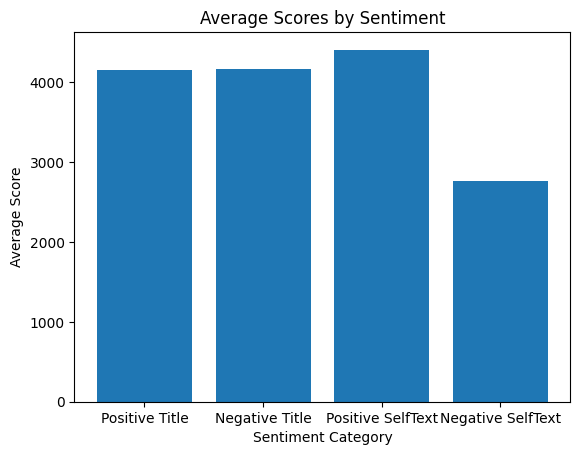

In [ ]:
import matplotlib.pyplot as plt

# Sample Data
categories = ['Positive Title', 'Negative Title', 'Positive SelfText', 'Negative SelfText']
values = [4154.3914516549385, 4166.0385036496355, 4403.758598966864, 2766.419565217391]  # Replace these with your average scores

# Create the bar plot
plt.bar(categories, values)

# Add labels and title
plt.xlabel('Sentiment Category')
plt.ylabel('Average Score')
plt.title('Average Scores by Sentiment')

# Show the plot
plt.show()

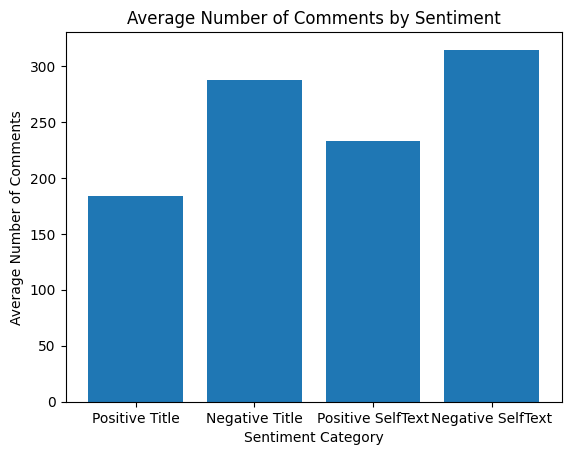

In [ ]:
import matplotlib.pyplot as plt

# Sample Data
categories = ['Positive Title', 'Negative Title', 'Positive SelfText', 'Negative SelfText']
values = [183.73286421683608, 287.61569343065696, 232.72659695098903, 314.468115942029]  # Replace these with your average comments

# Create the bar plot
plt.bar(categories, values)

# Add labels and title
plt.xlabel('Sentiment Category')
plt.ylabel('Average Number of Comments')
plt.title('Average Number of Comments by Sentiment')

# Show the plot
plt.show()

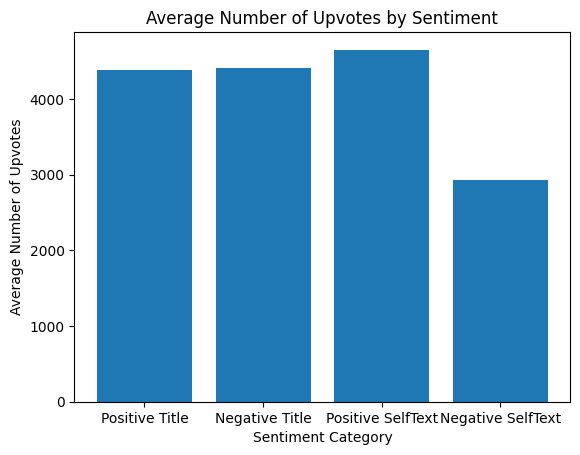

In [ ]:
import matplotlib.pyplot as plt

# Sample Data
categories = ['Positive Title', 'Negative Title', 'Positive SelfText', 'Negative SelfText']
values = [4386.437703935366, 4403.482844890511, 4651.250050396876, 2931.069427536232]  # Replace these with your average upvotes

# Create the bar plot
plt.bar(categories, values)

# Add labels and title
plt.xlabel('Sentiment Category')
plt.ylabel('Average Number of Upvotes')
plt.title('Average Number of Upvotes by Sentiment')

# Show the plot
plt.show()

In [ ]:
import pandas as pd

# Load the CSV file
data_clean = pd.read_csv('cleaned_data_with_engagement_and_positivity.csv')


data_clean['total_votes'] = data_clean['score'] / (2 * data_clean['upvote_ratio'] - 1)

# Calculate upvotes
data_clean['upvotes'] = data_clean['total_votes'] * data_clean['upvote_ratio']

data_clean['downvotes'] = data_clean['total_votes'] - data_clean['upvotes']

data_clean['upvotes'] = data_clean['upvotes'].round().astype(int)
data_clean['downvotes'] = data_clean['downvotes'].round().astype(int)

# Display the first few rows with upvote & downvote calculations
print(data_clean[['score', 'upvote_ratio', 'upvotes', 'downvotes']].head())


   score  upvote_ratio  upvotes  downvotes
0  17843          0.98    18215        372
1  16500          0.86    19708       3208
2  28025          0.93    30306       2281
3   8079          0.76    11808       3729
4  49342          0.92    54041       4699
